## Import Keras and Tensorflow

In [1]:
import keras
print("Using Keras",keras.__version__)
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

Using TensorFlow backend.



Using Keras 2.2.4
TensorFlow version: 1.15.2


## Create 3D CNN Model

In [2]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, ZeroPadding3D, Dropout, Input, Activation,BatchNormalization
from tensorflow.keras.regularizers import l1
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

def get_model2(summary=False):
    """
    Output:
        Return the model of the network
    """  
    model = Sequential()

    #1st layer of model
    model.add(Conv3D(64, kernel_size=(3, 3, 3), #kernel_regularizer=keras.regularizers.l1_l2(0.001), #bias_regularizer=l2(0.01),#kernel_initializer='he_uniform',activation='relu',
                    padding='same', name='conv1', 
                    strides=(1, 1, 1), input_shape=(16, 112, 112, 3)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), 
                            padding='valid', name='pool1'))
    #2nd layer of model
    model.add(Conv3D(128, kernel_size=(3, 3, 3), #kernel_regularizer=keras.regularizers.l1_l2(0.001), #kernel_regularizer=l2(0.001), #bias_regularizer=l2(0.01),#kernel_initializer='he_uniform',activation='relu',
                    padding='same', name='conv2',
                    strides=(1, 1, 1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                            padding='valid', name='pool2'))
    #3rd layer of model
    model.add(Conv3D(256, kernel_size=(3, 3, 3), #kernel_regularizer=keras.regularizers.l1_l2(0.001), #kernel_regularizer=l2(0.001), #bias_regularizer=l2(0.01),#kernel_initializer='he_uniform',activation='relu',
                    padding='same', name='conv3a',
                    strides=(1, 1, 1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(Conv3D(256, kernel_size=(3, 3, 3), #kernel_regularizer=keras.regularizers.l1_l2(0.001), #kernel_regularizer=l2(0.001),  #bias_regularizer=l2(0.01),#kernel_initializer='he_uniform',activation='relu',
                    padding='same', name='conv3b',
                    strides=(1, 1, 1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                            padding='valid', name='pool3'))
    #4th layer of model
    model.add(Conv3D(512, kernel_size=(3, 3, 3), #kernel_regularizer=keras.regularizers.l1_l2(0.001), #kernel_regularizer=l2(0.001), #bias_regularizer=l2(0.01),#kernel_initializer='he_uniform',activation='relu',
                    padding='same', name='conv4a',
                      strides=(1, 1, 1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(Conv3D(512, kernel_size=(3, 3, 3), #kernel_regularizer=keras.regularizers.l1_l2(0.001), #kernel_regularizer=l2(0.001), #bias_regularizer=l2(0.01),#kernel_initializer='he_uniform',activation='relu',
                    padding='same', name='conv4b',
                    strides=(1, 1, 1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                            padding='valid', name='pool4'))
    #5th layer of model
    model.add(Conv3D(512, kernel_size=(3, 3, 3), #kernel_regularizer=keras.regularizers.l1_l2(0.001), #kernel_regularizer=l2(0.001), #bias_regularizer=l2(0.01),#kernel_initializer='he_uniform',activation='relu',
                    padding='same', name='conv5a',
                    strides=(1, 1, 1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(Conv3D(512, kernel_size=(3, 3, 3),# kernel_regularizer=keras.regularizers.l1_l2(0.001), #kernel_regularizer=l2(0.001), #bias_regularizer=l2(0.01),#kernel_initializer='he_uniform',activation='relu',
                    padding='same', name='conv5b',
                    strides=(1, 1, 1)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation("relu"))
    model.add(ZeroPadding3D(padding=(0, 1, 1)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), 
                            padding='valid', name='pool5'))
    model.add(Flatten())
    # FC layers group
    model.add(Dense(4096, activation='relu', name='fc6'))
    model.add(Dropout(.5))
    model.add(Dense(4096, activation='relu', name='fc7'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid', name='fc8'))
    if summary:
        print(model.summary())
    return model

## Summary of the 3D CNN model

In [3]:
model2 = get_model2(summary=True)   
model2

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 16, 112, 112, 64)  5248      
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 112, 112, 64)  256       
_________________________________________________________________
activation (Activation)      (None, 16, 112, 112, 64)  0         
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 16, 56, 56, 64)    0         
_________________________________________________________________
conv2 (Conv3D)               (None, 16, 56, 56, 128)   221312    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 56, 56, 128)   512       
_________________________________________

## X-data: Combine augmentation techniques with original data

### X-train

In [ ]:
from io import BytesIO
import boto3
import pandas as pd
import numpy as np
client = boto3.client('s3')
bucket = "thesis-data-augmentation-data"

file_Xdata_MixTraditionalTechniquesAugmentationTrain = "X_data_MixTraditionalTechniquesAugmentationTrain.npy"
obj_x_train_style = client.get_object(Bucket= bucket, Key=file_Xdata_MixTraditionalTechniquesAugmentationTrain)
array_x_train = np.load(BytesIO(obj_x_train_style['Body'].read()))

print('successfully loaded augmentation train')

In [ ]:
file_Xdata_StyleAugmentationTrain = "X_data_StyleAugmentationTrain.npy"
obj_x_train_styleAugmentation = client.get_object(Bucket= bucket, Key=file_Xdata_StyleAugmentationTrain)
arrayStyleAug_x_train = np.load(BytesIO(obj_x_train_styleAugmentation['Body'].read()))

print('successfully loaded style augmentation train')

In [ ]:
print(len(arrayStyleAug_x_train))
array_x_train = array_x_train[:468]
arrayStyleAug_x_train = arrayStyleAug_x_train[468:935] 

In [ ]:
import numpy as np
xdata_concatenated_array_train = np.concatenate((array_x_train,arrayStyleAug_x_train))
print('Xtrain concatenated succesfully')

In [ ]:
file_Xdata_OriginalAugmentationTrain = "X_data_OriginalImagesTrain.npy"
obj_x_train_original = client.get_object(Bucket= bucket, Key=file_Xdata_OriginalAugmentationTrain)
array_x_train_original = np.load(BytesIO(obj_x_train_original['Body'].read()))

print('successfully loaded original train')

In [ ]:
import numpy as np
xdata_concatenated_array_train = np.concatenate((array_x_train_original,xdata_concatenated_array_train))
print('XtrainMix concatenated succesfully')

In [ ]:
file_Xdata_OriginalAugmentationTrain =[]
obj_x_train_original =[]
array_x_train_original =[]
arrayStyleAug_x_train =[]
array_x_train =[]
file_Xdata_StyleAugmentationTrain =[]
file_Xdata_MixTraditionalTechniquesAugmentationTrain =[]
obj_x_train_style = []

### X-test

In [ ]:
from io import BytesIO
import boto3
import pandas as pd
import numpy as np
client = boto3.client('s3')
bucket = "thesis-data-augmentation-data"

file_Xdata_MixTraditionalTechniquesAugmentationTest = "X_data_MixTraditionalTechniquesAugmentationTest.npy"
obj_x_test_style = client.get_object(Bucket= bucket, Key=file_Xdata_MixTraditionalTechniquesAugmentationTest)
array_x_test = np.load(BytesIO(obj_x_test_style['Body'].read()))

print('successfully loaded augmentation test')

In [ ]:
file_Xdata_StyleAugmentationTest = "X_data_StyleAugmentationTest.npy"
obj_x_test_styleAugmentation = client.get_object(Bucket= bucket, Key=file_Xdata_StyleAugmentationTest)
arrayStyleAug_x_test = np.load(BytesIO(obj_x_test_styleAugmentation['Body'].read()))

print('successfully loaded style augmentation test')

In [ ]:
print(len(array_x_test))
array_x_test = array_x_test[:156]
arrayStyleAug_x_test = arrayStyleAug_x_test[156:312]

In [ ]:
import numpy as np
xdata_concatenated_array_test = np.concatenate((array_x_test,arrayStyleAug_x_test))
print('XtestMix concatenated succesfully')

In [ ]:
file_Xdata_OriginalAugmentationTest = "X_data_OriginalImagesTest.npy"
obj_x_test_original = client.get_object(Bucket= bucket, Key=file_Xdata_OriginalAugmentationTest)
array_x_test_original = np.load(BytesIO(obj_x_test_original['Body'].read()))

print('successfully loaded original test')

In [ ]:
import numpy as np
xdata_concatenated_array_test = np.concatenate((array_x_test_original,xdata_concatenated_array_test))
print('Xtest concatenated succesfully')

In [ ]:
file_Xdata_OriginalAugmentationTest =[]
obj_x_test_original =[]
array_x_test_original =[]
arrayStyleAug_x_test =[]
array_x_test =[]
file_Xdata_StyleAugmentationTest =[]
file_Xdata_MixTraditionalTechniquesAugmentationTest =[]
obj_x_test_style = []

## Y-data: Combine augmentation techniques with original data

### Y-train

In [ ]:
from io import BytesIO
import boto3
import pandas as pd
import numpy as np
client = boto3.client('s3')
bucket = "thesis-data-augmentation-data"

file_Ydata_MixTraditionalTechniquesAugmentationTrain = "Y_data_MixTraditionalTechniquesAugmentationTrain.npy"
obj_y_train_style = client.get_object(Bucket= bucket, Key=file_Ydata_MixTraditionalTechniquesAugmentationTrain)
array_y_train = np.load(BytesIO(obj_y_train_style['Body'].read()))

print('successfully loaded augmentation train')

In [ ]:
file_Ydata_StyleAugmentationTrain = "Y_data_StyleAugmentationTrain.npy"
obj_y_train_styleAugmentation = client.get_object(Bucket= bucket, Key=file_Ydata_StyleAugmentationTrain)
arrayStyleAug_y_train = np.load(BytesIO(obj_y_train_styleAugmentation['Body'].read()))

print('successfully loaded style augmentation train')

In [ ]:
print(len(arrayStyleAug_y_train))
array_y_train = array_y_train[:468]
arrayStyleAug_y_train= arrayStyleAug_y_train[468:935]

In [ ]:
import numpy as np
ydata_concatenated_array_train = np.concatenate((array_y_train,arrayStyleAug_y_train))
print('Ytrain concatenated succesfully')

In [ ]:
file_Ydata_OriginalAugmentationTrain = "Y_data_OriginalImagesTrain.npy"
obj_y_train_original = client.get_object(Bucket= bucket, Key=file_Ydata_OriginalAugmentationTrain)
array_y_train_original = np.load(BytesIO(obj_y_train_original['Body'].read()))

print('successfully loaded original train')

In [ ]:
import numpy as np
ydata_concatenated_array_train = np.concatenate((array_y_train_original,ydata_concatenated_array_train))
print('YtrainMix concatenated succesfully')

In [ ]:
file_Ydata_OriginalAugmentationTrain =[]
obj_y_train_original =[]
array_y_train_original =[]
arrayStyleAug_y_train =[]
array_y_train =[]
file_Ydata_StyleAugmentationTrain =[]
file_Ydata_MixTraditionalTechniquesAugmentationTrain =[]
obj_y_train_style = []

### Y-test

In [ ]:
from io import BytesIO
import boto3
import pandas as pd
import numpy as np
client = boto3.client('s3')
bucket = "thesis-data-augmentation-data"

file_Ydata_MixTraditionalTechniquesAugmentationTest = "Y_data_MixTraditionalTechniquesAugmentationTest.npy"
obj_y_test_style = client.get_object(Bucket= bucket, Key=file_Ydata_MixTraditionalTechniquesAugmentationTest)
array_y_test = np.load(BytesIO(obj_y_test_style['Body'].read()))

print('successfully loaded augmentation test')

In [ ]:
file_Ydata_StyleAugmentationTest = "Y_data_StyleAugmentationTest.npy"
obj_y_test_styleAugmentation = client.get_object(Bucket= bucket, Key=file_Ydata_StyleAugmentationTest)
arrayStyleAug_y_test = np.load(BytesIO(obj_y_test_styleAugmentation['Body'].read()))

print('successfully loaded style augmentation test')

In [ ]:
print(len(arrayStyleAug_y_test))
array_y_test = array_y_test[:156]
arrayStyleAug_y_test= arrayStyleAug_y_test[156:312]

In [ ]:
import numpy as np
ydata_concatenated_array_test = np.concatenate((array_y_test,arrayStyleAug_y_test))
print('Ytest concatenated succesfully')

In [ ]:
file_Ydata_OriginalAugmentationTest = "Y_data_OriginalImagesTest.npy"
obj_y_test_original = client.get_object(Bucket= bucket, Key=file_Ydata_OriginalAugmentationTest)
array_y_test_original = np.load(BytesIO(obj_y_test_original['Body'].read()))

print('successfully loaded original test')

In [ ]:
import numpy as np
ydata_concatenated_array_test = np.concatenate((array_y_test_original,ydata_concatenated_array_test))
print('YestMix concatenated succesfully')

In [ ]:
file_Ydata_OriginalAugmentationTest =[]
obj_y_test_original =[]
array_y_test_original =[]
arrayStyleAug_y_test =[]
array_y_test =[]
file_Ydata_StyleAugmentationTest =[]
file_Ydata_MixTraditionalTechniquesAugmentationTest =[]
obj_y_test_style = []

## Load original data (without augmentation)

In [ ]:
import boto3
import pandas as pd

bucket = "thesis-data-augmentation-data"
file = "leeftijd_top_10.xlsx"
file_Xdata_augmentationTryTrain = "X_data_AugmentationTryTrain.npy"
file_Xdata_augmentationTryTest = "X_data_AugmentationTryTest.npy"
file_Ydata_augmentationTryTrain = "Y_data_AugmentationTryTrainOneList.npy"
file_Ydata_augmentationTryTest = "Y_data_AugmentationTryTestOneList.npy"

In [ ]:
from io import BytesIO
import boto3
import numpy as np

client = boto3.client('s3') #low-level functional API

obj_x_train = client.get_object(Bucket= bucket, Key=file_Xdata_augmentationTryTrain)
obj_x_test = client.get_object(Bucket= bucket, Key=file_Xdata_augmentationTryTest)
obj_y_train = client.get_object(Bucket= bucket, Key=file_Ydata_augmentationTryTrain)
obj_y_test = client.get_object(Bucket= bucket, Key=file_Ydata_augmentationTryTest)

array_x_train = np.load(BytesIO(obj_x_train['Body'].read()))
array_x_test = np.load(BytesIO(obj_x_test['Body'].read()))
array_y_train = np.load(BytesIO(obj_y_train['Body'].read()))
array_y_test = np.load(BytesIO(obj_y_test['Body'].read()))

In [ ]:
#get summary of loaded data
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

data_summary(array_x_train, array_y_train, array_x_test, array_y_test)

In [ ]:
x_val = array_x_test[-625:]
y_val = array_y_test[-625:]
array_x_test = array_x_test[:625]
array_y_test = array_y_test[:625]

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

## Train the model with sequence data

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

with tf.device('/gpu:0'):
    nr_epochs = 40
    batches_size = 16

    from tensorflow.keras.optimizers import SGD
    tf.debugging.set_log_device_placement(True)
    sgd = SGD(lr=0.001)

    model2.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

    # Save the model
    model_json = model2.to_json()
    with open("basicweights/model.json", "w") as json_file:
        json_file.write(model_json)

    # Save the weights using a checkpoint and save it model parameters to file each time it get better results.
    filepath="basicweights/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    
    
    full_history = []


    history = model2.fit(x=array_x_train, y=array_y_train, batch_size=batches_size, 
                         epochs=nr_epochs, validation_data=(x_val, y_val), verbose=1,
                          callbacks=callbacks_list,shuffle=True, initial_epoch=0 )


In [ ]:
print(history.history.keys())

## Plot the results of the trained model

In [ ]:
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Load trained model and evaluate with confusion matrix metrics

In [ ]:
model2.load_weights('weights>40epochs/weights-improvement-47-0.88.hdf5')
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.001)
model2.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model2.evaluate(array_x_test, array_y_test, batch_size=16)
print('test loss, test acc:', results)

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model2.predict(array_x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(array_y_test, y_pred_keras)


In [ ]:
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    
  
plot_roc_curve(fpr_keras,tpr_keras) 

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
auc_score=roc_auc_score(array_y_test, y_pred_keras) 
auc_score

In [ ]:
from sklearn.metrics import precision_score , recall_score
 
y_val_pred=model2.predict_classes(array_x_test)
 
print(precision_score(array_y_test,y_val_pred,average=None))

In [ ]:
print(recall_score(array_y_test,y_val_pred,average=None))

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(array_y_test, y_val_pred))

## Test on movies fight data

In [ ]:
import boto3
import pandas as pd

bucket = "thesis-data-augmentation-data"
file = "leeftijd_top_10.xlsx"
file_X_MoviesFights = "X_data_MoviesFights.npy"

file_Y_MoviesFights = "Y_data_MoviesFights.npy"

In [ ]:
from io import BytesIO
import boto3
import numpy as np

client = boto3.client('s3') #low-level functional API

obj_x_moviesfight = client.get_object(Bucket= bucket, Key=file_X_MoviesFights)
obj_y_moviesfight = client.get_object(Bucket= bucket, Key=file_Y_MoviesFights)

array_x_moviesfight = np.load(BytesIO(obj_x_moviesfight['Body'].read()))

array_y_moviesfight = np.load(BytesIO(obj_y_moviesfight['Body'].read()))

#### Load trained model and evaluate with confusion matrix metrics

In [ ]:
model2.load_weights('weights>40epochs/weights-improvement-47-0.88.hdf5')
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.001)

model2.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Evaluate the model on the movies fight data using `evaluate`
print('\n# Evaluate on movies fight data')
results = model2.evaluate(array_x_moviesfight, array_y_moviesfight, batch_size=16)
print('test loss, test acc:', results)

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model2.predict(array_x_moviesfight).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(array_y_moviesfight, y_pred_keras)

In [ ]:
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    
  
plot_roc_curve(fpr_keras,tpr_keras) 

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
auc_score=roc_auc_score(array_y_moviesfight, y_pred_keras)  
auc_score

In [ ]:
from sklearn.metrics import precision_score , recall_score
 
y_val_pred=model2.predict_classes(array_x_moviesfight)
 
print(precision_score(array_y_moviesfight,y_val_pred,average=None))

In [ ]:
print(recall_score(array_y_moviesfight,y_val_pred,average=None))

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(array_y_moviesfight, y_val_pred))

## Test on crowding fight data

#### Dataset is too big to load in one time, so it is loaded in parts and merged together.

In [ ]:
import boto3
import pandas as pd

bucket = "thesis-data-augmentation-data"
file = "leeftijd_top_10.xlsx"
file_X_CrowdFights_Part1 = "X_data_CrowdFights_Part1.npy"
file_X_CrowdFights_Part2 = "X_data_CrowdFights_Part2.npy"
file_X_CrowdFights_Part3 = "X_data_CrowdFights_Part3.npy"
file_X_CrowdFights_Part4 = "X_data_CrowdFights_Part4.npy"

file_Y_CrowdFights_Part1 = "Y_data_CrowdFights_Part1.npy"
file_Y_CrowdFights_Part2 = "Y_data_CrowdFights_Part2.npy"
file_Y_CrowdFights_Part3 = "Y_data_CrowdFights_Part3.npy"
file_Y_CrowdFights_Part4 = "Y_data_CrowdFights_Part4.npy"

In [ ]:
from io import BytesIO
import boto3
import numpy as np

client = boto3.client('s3') #low-level functional API

obj_x_CrowdFights_Part1 = client.get_object(Bucket= bucket, Key=file_X_CrowdFights_Part1)
obj_x_CrowdFights_Part2 = client.get_object(Bucket= bucket, Key=file_X_CrowdFights_Part2)
obj_x_CrowdFights_Part3 = client.get_object(Bucket= bucket, Key=file_X_CrowdFights_Part3)
obj_x_CrowdFights_Part4 = client.get_object(Bucket= bucket, Key=file_X_CrowdFights_Part4)

obj_y_CrowdFights_Part1 = client.get_object(Bucket= bucket, Key=file_Y_CrowdFights_Part1)
obj_y_CrowdFights_Part2 = client.get_object(Bucket= bucket, Key=file_Y_CrowdFights_Part2)
obj_y_CrowdFights_Part3 = client.get_object(Bucket= bucket, Key=file_Y_CrowdFights_Part3)
obj_y_CrowdFights_Part4 = client.get_object(Bucket= bucket, Key=file_Y_CrowdFights_Part4)

array_x_CrowdFights_Part1 = np.load(BytesIO(obj_x_CrowdFights_Part1['Body'].read()))
array_x_CrowdFights_Part2 = np.load(BytesIO(obj_x_CrowdFights_Part2['Body'].read()))
array_x_CrowdFights_Part3 = np.load(BytesIO(obj_x_CrowdFights_Part3['Body'].read()))
array_x_CrowdFights_Part4 = np.load(BytesIO(obj_x_CrowdFights_Part4['Body'].read()))

array_y_CrowdFights_Part1 = np.load(BytesIO(obj_y_CrowdFights_Part1['Body'].read()))
array_y_CrowdFights_Part2 = np.load(BytesIO(obj_y_CrowdFights_Part2['Body'].read()))
array_y_CrowdFights_Part3 = np.load(BytesIO(obj_y_CrowdFights_Part3['Body'].read()))
array_y_CrowdFights_Part4 = np.load(BytesIO(obj_y_CrowdFights_Part4['Body'].read()))

In [ ]:
import numpy as np
xdata_concatenated_arrayCrowdFights = np.concatenate((array_x_CrowdFights_Part1,array_x_CrowdFights_Part2,array_x_CrowdFights_Part3,array_x_CrowdFights_Part4))
print('Xdata CrowdFights concatenated succesfully')

In [ ]:
import numpy as np
ydata_concatenated_arrayCrowdFights = np.concatenate((array_y_CrowdFights_Part1,array_y_CrowdFights_Part2,array_y_CrowdFights_Part3,array_y_CrowdFights_Part4))
print('Ydata CrowdFights concatenated succesfully')

#### Load trained model and evaluate with confusion matrix metrics

In [4]:
model2.load_weights('weights>40epochs/weights-improvement-47-0.88.hdf5')
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.001)

model2.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# Evaluate the model on the crowd fight data using `evaluate`
print('\n# Evaluate on crowd fight data')
results = model2.evaluate(xdata_concatenated_arrayCrowdFights, ydata_concatenated_arrayCrowdFights, batch_size=16)
print('test loss, test acc:', results)

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model2.predict(xdata_concatenated_arrayCrowdFights).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ydata_concatenated_arrayCrowdFights, y_pred_keras)

In [ ]:
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    
  
plot_roc_curve(fpr_keras,tpr_keras) 

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
auc_score=roc_auc_score(ydata_concatenated_arrayCrowdFights, y_pred_keras) 
auc_score

In [ ]:
from sklearn.metrics import precision_score , recall_score
 
y_val_pred=model2.predict_classes(xdata_concatenated_arrayCrowdFights)
 
print(precision_score(ydata_concatenated_arrayCrowdFights,y_val_pred,average=None))

In [ ]:
print(recall_score(ydata_concatenated_arrayCrowdFights,y_val_pred,average=None))

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(ydata_concatenated_arrayCrowdFights, y_val_pred))

## Test on hockey fight data

#### Dataset is too big to load in one time, so it is loaded in parts and merged together.

In [4]:
import boto3
import pandas as pd

bucket = "thesis-data-augmentation-data"
file = "leeftijd_top_10.xlsx"
file_X_HockeyFights_Part1 = "X_data_HockeyFights_Part1.npy"
file_X_HockeyFights_Part2 = "X_data_HockeyFights_Part2.npy"
file_X_HockeyFights_Part3 = "X_data_HockeyFights_Part3.npy"
file_X_HockeyFights_Part4 = "X_data_HockeyFights_Part4.npy"
file_X_HockeyFights_Part5 = "X_data_HockeyFights_Part5.npy"
file_X_HockeyFights_Part6 = "X_data_HockeyFights_Part6.npy"
file_X_HockeyFights_Part7 = "X_data_HockeyFights_Part7.npy"


file_Y_HockeyFights_Part1 = "Y_data_HockeyFights_Part1.npy"
file_Y_HockeyFights_Part2 = "Y_data_HockeyFights_Part2.npy"
file_Y_HockeyFights_Part3 = "Y_data_HockeyFights_Part3.npy"
file_Y_HockeyFights_Part4 = "Y_data_HockeyFights_Part4.npy"
file_Y_HockeyFights_Part5 = "Y_data_HockeyFights_Part5.npy"
file_Y_HockeyFights_Part6 = "Y_data_HockeyFights_Part6.npy"
file_Y_HockeyFights_Part7 = "Y_data_HockeyFights_Part7.npy"

In [5]:
from io import BytesIO
import boto3
import numpy as np

client = boto3.client('s3') #low-level functional API

obj_x_HockeyFights_Part1 = client.get_object(Bucket= bucket, Key=file_X_HockeyFights_Part1)
obj_x_HockeyFights_Part2 = client.get_object(Bucket= bucket, Key=file_X_HockeyFights_Part2)
obj_x_HockeyFights_Part3 = client.get_object(Bucket= bucket, Key=file_X_HockeyFights_Part3)
obj_x_HockeyFights_Part4 = client.get_object(Bucket= bucket, Key=file_X_HockeyFights_Part4)
obj_x_HockeyFights_Part5 = client.get_object(Bucket= bucket, Key=file_X_HockeyFights_Part5)
obj_x_HockeyFights_Part6 = client.get_object(Bucket= bucket, Key=file_X_HockeyFights_Part6)
obj_x_HockeyFights_Part7 = client.get_object(Bucket= bucket, Key=file_X_HockeyFights_Part7)

obj_y_HockeyFights_Part1 = client.get_object(Bucket= bucket, Key=file_Y_HockeyFights_Part1)
obj_y_HockeyFights_Part2 = client.get_object(Bucket= bucket, Key=file_Y_HockeyFights_Part2)
obj_y_HockeyFights_Part3 = client.get_object(Bucket= bucket, Key=file_Y_HockeyFights_Part3)
obj_y_HockeyFights_Part4 = client.get_object(Bucket= bucket, Key=file_Y_HockeyFights_Part4)
obj_y_HockeyFights_Part5 = client.get_object(Bucket= bucket, Key=file_Y_HockeyFights_Part5)
obj_y_HockeyFights_Part6 = client.get_object(Bucket= bucket, Key=file_Y_HockeyFights_Part6)
obj_y_HockeyFights_Part7 = client.get_object(Bucket= bucket, Key=file_Y_HockeyFights_Part7)

array_x_HockeyFights_Part1 = np.load(BytesIO(obj_x_HockeyFights_Part1['Body'].read()))
array_x_HockeyFights_Part2 = np.load(BytesIO(obj_x_HockeyFights_Part2['Body'].read()))
array_x_HockeyFights_Part3 = np.load(BytesIO(obj_x_HockeyFights_Part3['Body'].read()))
array_x_HockeyFights_Part4 = np.load(BytesIO(obj_x_HockeyFights_Part4['Body'].read()))
array_x_HockeyFights_Part5 = np.load(BytesIO(obj_x_HockeyFights_Part5['Body'].read()))
array_x_HockeyFights_Part6 = np.load(BytesIO(obj_x_HockeyFights_Part6['Body'].read()))
array_x_HockeyFights_Part7 = np.load(BytesIO(obj_x_HockeyFights_Part7['Body'].read()))

array_y_HockeyFights_Part1 = np.load(BytesIO(obj_y_HockeyFights_Part1['Body'].read()))
array_y_HockeyFights_Part2 = np.load(BytesIO(obj_y_HockeyFights_Part2['Body'].read()))
array_y_HockeyFights_Part3 = np.load(BytesIO(obj_y_HockeyFights_Part3['Body'].read()))
array_y_HockeyFights_Part4 = np.load(BytesIO(obj_y_HockeyFights_Part4['Body'].read()))
array_y_HockeyFights_Part5 = np.load(BytesIO(obj_y_HockeyFights_Part5['Body'].read()))
array_y_HockeyFights_Part6 = np.load(BytesIO(obj_y_HockeyFights_Part6['Body'].read()))
array_y_HockeyFights_Part7 = np.load(BytesIO(obj_y_HockeyFights_Part7['Body'].read()))

In [6]:
import numpy as np
xdata_concatenated_arrayHockeyFights = np.concatenate((array_x_HockeyFights_Part1,array_x_HockeyFights_Part2,array_x_HockeyFights_Part3,array_x_HockeyFights_Part4,array_x_HockeyFights_Part5,array_x_HockeyFights_Part6,array_x_HockeyFights_Part7))
print('Xdata HockeyFights concatenated succesfully')

Xdata HockeyFights concatenated succesfully


In [7]:
import numpy as np
ydata_concatenated_arrayHockeyFights = np.concatenate((array_y_HockeyFights_Part1,array_y_HockeyFights_Part2,array_y_HockeyFights_Part3,array_y_HockeyFights_Part4,array_y_HockeyFights_Part5,array_y_HockeyFights_Part6,array_y_HockeyFights_Part7))
print('Ydata HockeyFights concatenated succesfully')

Ydata HockeyFights concatenated succesfully


#### Load trained model and evaluate with confusion matrix metrics

In [8]:
model2.load_weights('weights>40epochs/weights-improvement-47-0.88.hdf5')
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.001)

model2.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
# Evaluate the model on the hockey fight data using `evaluate`
print('\n# Evaluate on hockey fights data')
with tf.device('/gpu:0'):
    results = model2.evaluate(xdata_concatenated_arrayHockeyFights, ydata_concatenated_arrayHockeyFights, batch_size=16)
print('test loss, test acc:', results)


# Evaluate on hockey fights data
5018/5018 [==============================] - 331s 66ms/sample - loss: 1.4945 - acc: 0.7176
test loss, test acc: [1.4945166171333524, 0.71761656]


In [10]:
from sklearn.metrics import roc_curve
y_pred_keras = model2.predict(xdata_concatenated_arrayHockeyFights).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ydata_concatenated_arrayHockeyFights, y_pred_keras)

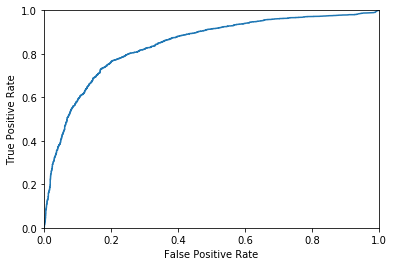

In [11]:
def plot_roc_curve(fpr,tpr): 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    
  
plot_roc_curve(fpr_keras,tpr_keras) 

In [12]:
from sklearn.metrics import roc_curve,roc_auc_score
auc_score=roc_auc_score(ydata_concatenated_arrayHockeyFights, y_pred_keras) 
auc_score

0.8415015885623511

In [13]:
from sklearn.metrics import precision_score , recall_score
 
y_val_pred=model2.predict_classes(xdata_concatenated_arrayHockeyFights)
 
print(precision_score(ydata_concatenated_arrayHockeyFights,y_val_pred,average=None))

[0.65197867 0.87835052]


In [14]:
print(recall_score(ydata_concatenated_arrayHockeyFights,y_val_pred,average=None))

[0.9292     0.50754567]


In [15]:
from sklearn.metrics import classification_report
 
print(classification_report(ydata_concatenated_arrayHockeyFights, y_val_pred))

              precision    recall  f1-score   support

           0       0.65      0.93      0.77      2500
           1       0.88      0.51      0.64      2518

    accuracy                           0.72      5018
   macro avg       0.77      0.72      0.70      5018
weighted avg       0.77      0.72      0.70      5018

